In [3]:
# TITLE
#introduction
#Web Site for Aussie Airport Passenger Movements and changing  rate per year and airports

In [4]:
__author__ = 'utting'
# Read the input CSV file
infile = open("airline-passenger-movements.csv", "r")
data = []
for line in infile:
    cols = line.split(",")
    # print(cols)
    air = cols[0]
    # clean up the Airport column, removing spaces
    year = cols[1].strip().replace(" ", "")
    month = cols[2].strip().replace(" ", "")
    di = cols[3].strip().replace(" ", "")
    do = cols[4].strip().replace(" ", "")
    dt = cols[5].strip().replace(" ", "")
    ii = cols[6].strip().replace(" ", "")
    io = cols[7].strip().replace(" ", "")
    it = cols[8].strip().replace(" ", "")
    pi = cols[9].strip().replace(" ", "")
    po = cols[10].strip().replace(" ", "")
    pt = cols[11].strip().replace(" ", "")
    # print(country, pop * 1.1)
    pair = (air, year,month,di,do,dt,ii,io,it,pi,po,pt)
    data.append(pair)
infile.close()

In [5]:
import pandas as pd
df=pd.read_csv("airline-passenger-movements.csv")


AIRPORT          object
Year              int64
Month             int64
Dom_Pax_In        int64
Dom_Pax_Out       int64
Dom_Pax_Total     int64
Int_Pax_In        int64
Int_Pax_Out       int64
Int_Pax_Total     int64
Pax_In            int64
Pax_Out           int64
Pax_Total         int64
dtype: object

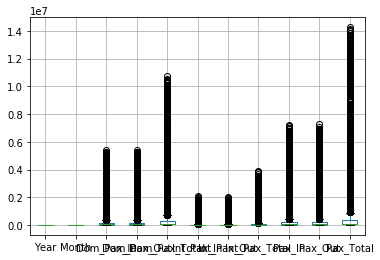

In [6]:
%matplotlib inline
df.boxplot()
df.dtypes

In [7]:
header = """
<!DOCTYPE html>
<html>
<head >
<title>Index</title>
<meta charset="utf-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
<style>
* {
    box-sizing: border-box;
}

body {
  margin: 0;
  background-color: #D3FEFE;
  text-align: center;
}

/* Style the header */
.header {
    background-color: #f1f1f1;
    padding: 20px;
    text-align: center;
}

/* Style the top navigation bar */
.topnav {
    overflow: hidden;
    background-color: #333;
}

/* Style the topnav links */
.topnav a {
    float: left;
    display: block;
    color: #f2f2f2;
    text-align: center;
    padding: 14px 16px;
    text-decoration: none;
}

/* Change color on hover */
.topnav a:hover {
    background-color: #ddd;
    color: black;
}

/* Create three unequal columns that floats next to each other */
.column {
    float: left;
    padding: 10px;
}

/* Left and right column */
.column.side {
    width: 25%;
}

/* Middle column */
.column.middle {
    width: 50%;
}

/* Clear floats after the columns */
.row:after {
    content: "";
    display: table;
    clear: both;
}

/* Responsive layout - makes the three columns stack on top of each other instead of next to each other */
@media screen and (max-width: 600px) {
    .column.side, .column.middle {
        width: 100%;
    }
}

/* Style the footer */
.footer {
    background-color: #f1f1f1;
    padding: 10px;
    text-align: center;
    bottom: 0;
}
.container {
   height:100%;
}
</style>
</head>
<div id="container">
<body >

<div class="header">
<h1>Aussie Airport Passenger Movements</h1>
</div>
"""

In [8]:
footer="""
<div class="footer">
  <p>&copy Amit Hasan 2018</p>
</div>

</body>
</div>
</html>
"""

In [9]:
# writing data into a .html file.
out1 = open("AussieAirport.html", "w")
out1.write(header)
out1.write("<table border = 1>")
for (a, y,m,di,do,dt,ii,io,it,pi,po,pt) in data:
        out1.write("<tr><td>" + a + "</td><td>" + y + "</td><td>" + m +"</td><td>" + di +"</td><td>"+ do +"</td><td>" + dt +"</td><td>" + ii +"</td><td>"+ io +"</td><td>"+ it +"</td><td>" + pi +"</td><td>"+ po +"</td><td>" + pt+"</td></tr>")
out1.write("</table>")
out1.write(footer)
out1.close()

In [10]:

# writing data into a .html file.
out1 = open("TotalPerYear.html", "w")
out1.write(header)
out1.write("<table border = 1>")
lines = [line.rstrip('\n') for line in open("airline-passenger-movements.csv")]
l=1
cal_year=1985
sum_py=0
sum_py_old=0
out1.write("<tr><td>" + "Year" + "</td><td>" + "Total Passenger" + "</td><td>"+"Passenger Increased from Last year"+"</td></tr>")
while(l<len(lines)):
    column=lines[l].split(',')    
    if(cal_year==int(column[1])):
        sum_py = sum_py+int(column[11])
    else:
        pioy=int(sum_py)-int(sum_py_old)
        sum_py_old=int(sum_py)
        pioy=str(pioy)
        cal_year=str(cal_year)
        sum_py=str(sum_py)        
        out1.write("<tr><td>" + cal_year + "</td><td>" + sum_py +"</td><td>"+ pioy +"</td></tr>")
        cal_year=int(cal_year)
        cal_year=cal_year+1
        sum_py=int(0)
        
    l=l+1
pioy=int(sum_py)-int(sum_py_old)
out1.write("<tr><td>" + str(cal_year) + "</td><td>" + str(sum_py) +"</td><td>"+ str(pioy) +"</td></tr>")
out1.write("</table>")
out1.write(footer)
out1.close()

In [11]:

# writing data into a .html file.
out1 = open("TotalPerAirport.html", "w")
out1.write(header)
out1.write("<table border = 1>")

l=1
l2=1
column=lines[l].split(',')
airport=column[0]
airports=[]
airports.append(airport)
air=0
sum_py=0
out1.write("<tr><td>"+ "No." +"</td><td>"  + "Airport" + "</td><td>" + "Total Passenger" + "</td></tr>")
while (l<len(lines)):
    column=lines[l].split(',')
    airport=column[0]
    l=l+1
    n=0
    ln=len(airports)-1
    while(n<len(airports)):
        if (airport==airports[n]):
            break
        elif(n==ln):
            if(airport == 'All Australian Airports'):
                n=n+1
            else:
                airports.append(airport)
                break
        else:
            n=n+1
while(air<len(airports)):    
    while(l2<len(lines)):
            column=lines[l2].split(',')
            if(column[0]==airports[air]):
                sum_py = sum_py+int(column[11])
            l2=l2+1
    out1.write("<tr><td>" + str(air+1) +"</td><td>" + str(airports[air]) + "</td><td>" + str(sum_py) +"</td></tr>")
    air=air+1
    sum_py=0
    l2=1

out1.write("</table>")
out1.write(footer)
out1.close()



In [12]:
# writing data into a .html file.
out1 = open("TotalPerState.html", "w")
out1.write(header)
out1.write("<table border = 1>")
lines2 = ['South Australia','Northern Territory','New South Wales','Queensland','Queensland','Australian Capital Territory','Northern Territory',
'Queensland','Queensland','Tasmania','Western Australia','Tasmania','Queensland','Victoria','Western Australia','Queensland','Queensland','New South Wales',
'Queensland','New South Wales']
state=lines2[0]
states=[]
states.append(state)
sta=0
s=0
s2=0
l=1
l2=1
column=lines[l].split(',')
airport=column[0]
airports=[]
airports.append(airport)
air=0
sum_py=0
airPass=[]
airstate=[]
out1.write("<tr><td>"+ "No." +"</td><td>"  + "Airport" + "</td><td>" + "Total Passenger" + "</td></tr>")
while (l<len(lines)):
    column=lines[l].split(',')
    airport=column[0]
    l=l+1
    n=0
    ln=len(airports)-1
    while(n<len(airports)):
        if (airport==airports[n]):
            break
        elif(n==ln):
            if(airport == 'All Australian Airports'):
                n=n+1
            else:
                airports.append(airport)
                break
        else:
            n=n+1
while(air<len(airports)):    
    while(l2<len(lines)):
            column=lines[l2].split(',')
            if(column[0]==airports[air]):
                sum_py = sum_py+int(column[11])
            l2=l2+1
    airPass.append(int(sum_py))
    air=air+1
    sum_py=0
    l2=1
    
while (s<len(lines2)):
    ns=0
    sn=len(states)-1
    state=lines2[s]
    s=s+1
    while(ns<len(states)):
        if (state==states[ns]):
            break
        elif(ns==sn):
            states.append(state)
            break
        else:
            ns=ns+1
while(sta<len(states)):    
    while(s2<len(lines2)):
        if(lines2[s2]==states[sta]):
                sum_py = sum_py+ airPass[s2]
        s2=s2+1
    out1.write("<tr><td>" + str(sta+1) +"</td><td>" + str(states[sta]) + "</td><td>" + str(sum_py) +"</td></tr>")
    sta=sta+1
    sum_py=0
    s2=0
out1.write("</table>")
out1.write(footer)
out1.close()

In [13]:
# writing data into a .html file.
out1 = open("TotalPerSeason.html", "w")
out1.write(header)
out1.write("<table border = 1>")
sum_pys = sum_pyw = 0
l=0
while (l<len(lines)):
    column=lines[l].split(',')
    l=l+1
    if(column[0]=='All Australian Airports'):
        if(int(column[2])==12 or int(column[2])==1 or int(column[2])==2):
            sum_pys = sum_pys + int(column[11])
        elif(int(column[2])==6 or int(column[2])==7 or int(column[2])==8):
            sum_pyw = sum_pyw + int(column[11])
        else:
            l=l
out1.write("<tr><td>" + "No." +"</td><td>" + "Time Period" + "</td><td>" + "Total Passenger Australia Wide" +"</td></tr>")
out1.write("<tr><td>" + "Summer(December,January,February)" +"</td><td>" + "1985-2018" + "</td><td>" + str(sum_pys) +"</td></tr>")
out1.write("<tr><td>" + "Winter(June,July,August)" +"</td><td>" + "1985-2018" + "</td><td>" + str(sum_pyw) +"</td></tr>")

out1.write("</table>")


out1.write(footer)
out1.close()

In [14]:
index="""



<p>This is a database website, in this website you can find Airport Passenger Movements of Australia Full Chart and few graphical and written statistics</p>
<div class="topnav">
<a href="AussieAirport.html">Airport Passenger Movements of Australia Full Chart</a>
<a href="TotalPerYear.html">Airport Passenger Movements of Australia by Year</a>
<a href="TotalPerAirport.html">Airport Passenger Movements of Australia per Airport</a>
<a href="TotalPerState.html">Airport Passenger Movements of Australia per State</a>
<a href="TotalPerSeason.html">Airport Passenger Movements of Australia per Season</a>
</div>
<img src="1..jpeg" alt="Plane Parking Bay" width= "600" align="middle">
"""

In [15]:
out = open("Index.html", "w")
out.write(header)
out.write(index)
out.write(footer)
out.close()